In [3]:
import wbgapi as wb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Choosing 10 countries from different continents to make the analysis global
country_codes = ["BGD","USA","ARG","BRA","ESP","GBR","SWE","CMR","NGA","VNM",]

In [5]:
#Selecting indicator ids from World Bank Data
forest_id = ["AG.LND.FRST.ZS"]
pop_growth_id = ["SP.POP.GROW"]
co2_id = ["EN.ATM.CO2E.KT"]
agri_land_id = ["AG.LND.AGRI.ZS"]

I wanted to show analysis for the last 6 years but the data from 2020 and 2021 wasn't available for CO2 emissions and Agricultural Lands. So I picked the years ranging between 2013-2019

In [6]:
#Creating Forest % dataframe using the indicator id and country codes
forest = wb.data.DataFrame(
    forest_id,country_codes, range(2013, 2019), columns='time', skipAggs=True,  numericTimeKeys=True)

In [7]:
#Creating Population Growth dataframe using the indicator id and country codes
pop_growth = wb.data.DataFrame(
    pop_growth_id,country_codes, range(2013, 2019), columns='time', skipAggs=True, numericTimeKeys=True)

In [8]:
#Creating CO2 Emissions dataframe using the indicator id and country codes
co2 = wb.data.DataFrame(
    co2_id,country_codes, range(2013, 2019), columns='time', skipAggs=True, numericTimeKeys=True)

In [9]:
#Creating Agricultural Land % dataframe using the indicator id and country codes
agri_land = wb.data.DataFrame(
    agri_land_id,country_codes, range(2013, 2019), columns='time', skipAggs=True,  numericTimeKeys=True)

In [10]:
#Creating a function to change header names
def header (df):
    '''changes the column header name from economy to country
    '''
    df.index.names = ['country']

In [11]:
#Using the created header function to rename the headers from economy to country 
header(forest)
forest.head(5)

,2013,2014,2015,2016,2017,2018
country,,,,,,
ARG,10.795450,10.713819,10.632187,10.600397,10.559837,10.520373
BGD,14.483958,14.476365,14.468772,14.468772,14.468772,14.468772
BRA,60.655021,60.470868,60.286715,60.071033,59.832881,59.708428
CMR,43.858772,43.740306,43.621840,43.503374,43.384908,43.266442
ESP,37.082114,37.084449,37.127532,37.142869,37.152234,37.156647


In [12]:
#Transposing the data have countries as columns headers
forest_2 = forest.transpose()
forest_2.index.names = ['year']
forest_2.head(5)

country,ARG,BGD,BRA,CMR,ESP,GBR,NGA,SWE,USA,VNM
year,,,,,,,,,,
2013,10.795450,14.483958,60.655021,43.858772,37.082114,12.882239,25.000892,68.780871,33.839596,44.481375
2014,10.713819,14.476365,60.470868,43.740306,37.084449,12.961600,24.821586,68.740272,33.869659,44.915987
2015,10.632187,14.468772,60.286715,43.621840,37.127532,13.040962,24.642281,68.694606,33.899723,45.350598
2016,10.600397,14.468772,60.071033,43.503374,37.142869,13.057496,24.462980,68.694606,33.899723,46.369142
2017,10.559837,14.468772,59.832881,43.384908,37.152234,13.078163,24.283683,68.694606,33.866926,46.490760


In [13]:
#Using the created header function to rename the headers from economy to country 
header(pop_growth)
pop_growth.head(5)

,2013,2014,2015,2016,2017,2018
country,,,,,,
ARG,1.119109,1.099461,1.078001,1.057182,1.037134,1.015808
BGD,1.155951,1.142930,1.119091,1.095288,1.075535,1.053570
BRA,0.873606,0.855796,0.838839,0.823752,0.807145,0.783844
CMR,2.718249,2.701525,2.681848,2.660502,2.637754,2.612284
ESP,-0.327669,-0.298951,-0.077589,0.084430,0.234588,0.437983


In [14]:
#Transposing the data have countries as columns headers
pop_growth_2 = pop_growth.transpose()
pop_growth_2.index.names = ['year']
pop_growth_2.head(5)

country,ARG,BGD,BRA,CMR,ESP,GBR,NGA,SWE,USA,VNM
year,,,,,,,,,,
2013,1.119109,1.155951,0.873606,2.718249,-0.327669,0.669741,2.676908,0.847349,0.692860,1.053062
2014,1.099461,1.142930,0.855796,2.701525,-0.298951,0.736464,2.665007,0.992220,0.733362,1.053636
2015,1.078001,1.119091,0.838839,2.681848,-0.077589,0.792368,2.647406,1.057455,0.736217,1.044781
2016,1.057182,1.095288,0.823752,2.660502,0.084430,0.757874,2.627675,1.256454,0.724676,1.034107
2017,1.037134,1.075535,0.807145,2.637754,0.234588,0.679374,2.607667,1.347445,0.632644,1.020199


In [15]:
#Using the created header function to rename the headers from economy to country 
header(co2)
co2.head(5)

,2013,2014,2015,2016,2017,2018
country,,,,,,
ARG,184000.0,179910.0,186090.0,184280.0,180120.0,177410.0
BGD,60580.0,63800.0,71690.0,73740.0,78710.0,82760.0
BRA,482860.0,506780.0,479970.0,441910.0,449840.0,427710.0
CMR,7370.0,7750.0,8010.0,8550.0,8320.0,8620.0
ESP,242800.0,240960.0,256280.0,247030.0,263440.0,258340.0


In [16]:
#Transposing the data have countries as columns headers
co2_2 = co2.transpose()
co2_2.index.names = ['year']
co2_2.head(5)

country,ARG,BGD,BRA,CMR,ESP,GBR,NGA,SWE,USA,VNM
year,,,,,,,,,,
2013,184000.0,60580.0,482860.0,7370.0,242800.0,453060.0,110720.0,40550.0,5089500.0,153630.0
2014,179910.0,63800.0,506780.0,7750.0,240960.0,414850.0,116200.0,39100.0,5102580.0,168560.0
2015,186090.0,71690.0,479970.0,8010.0,256280.0,400370.0,108150.0,39200.0,4982790.0,209200.0
2016,184280.0,73740.0,441910.0,8550.0,247030.0,378890.0,108420.0,38790.0,4888640.0,223870.0
2017,180120.0,78710.0,449840.0,8320.0,263440.0,366380.0,112920.0,38330.0,4813720.0,222130.0


In [17]:
#Using the created header function to rename the headers from economy to country 
header(agri_land)
agri_land.head(5)

,2013,2014,2015,2016,2017,2018
country,,,,,,
ARG,54.518049,54.335712,54.335712,54.335712,54.335712,54.360560
BGD,69.970039,69.900899,70.386725,70.632327,70.579473,70.694476
BRA,27.996253,28.082492,28.168731,28.254971,28.341066,28.341090
CMR,20.625754,20.625754,20.625754,20.625754,20.625754,20.625754
ESP,53.443954,53.133684,53.189062,52.577247,52.638714,52.408210


In [18]:
#Transposing the data have countries as columns headers
agri_land_2 = agri_land.transpose()
agri_land_2.index.names = ['year']
agri_land_2.head(5)

country,ARG,BGD,BRA,CMR,ESP,GBR,NGA,SWE,USA,VNM
year,,,,,,,,,,
2013,54.518049,69.970039,27.996253,20.625754,53.443954,71.302443,74.999108,7.482447,44.124682,35.001129
2014,54.335712,69.900899,28.082492,20.625754,53.133684,71.227214,75.178414,7.445680,44.184360,35.068533
2015,54.335712,70.386725,28.168731,20.625754,53.189062,70.838672,75.357719,7.463112,44.244027,39.177605
2016,54.335712,70.632327,28.254971,20.625754,52.577247,71.714884,75.537020,7.442734,44.303705,39.256297
2017,54.335712,70.579473,28.341066,20.625754,52.638714,72.195067,75.716317,7.416955,44.363367,39.245332


### Visualisation

#### For country wise (in x-axis) visualization, I went for bar chart since it's easier to identify the difference among the countries and also shows the yearly increment and decrement.

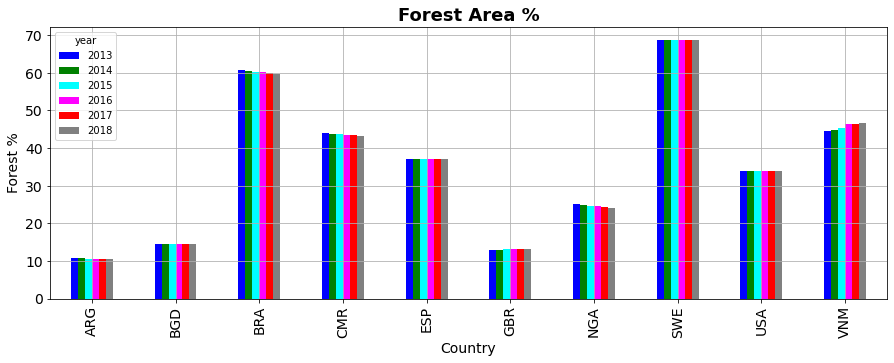

In [304]:
#Forest
forest.plot(kind='bar', color=['blue', 'green', 'cyan', 'magenta', 'red','gray'], figsize=(15,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Country",fontsize=14)
plt.ylabel("Forest %",fontsize = 14)
plt.title("Forest Area %",fontsize = 18, fontweight='bold')
plt.grid(True)

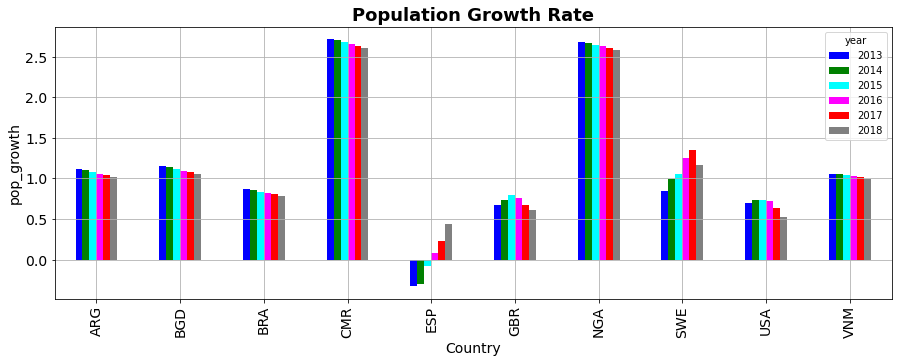

In [305]:
#pop_growth
pop_growth.plot(kind='bar', color=['blue', 'green', 'cyan', 'magenta', 'red','gray'], figsize=(15,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Country",fontsize=14)
plt.ylabel("pop_growth",fontsize = 14)
plt.title("Population Growth Rate",fontsize = 18, fontweight='bold')
plt.grid(True)

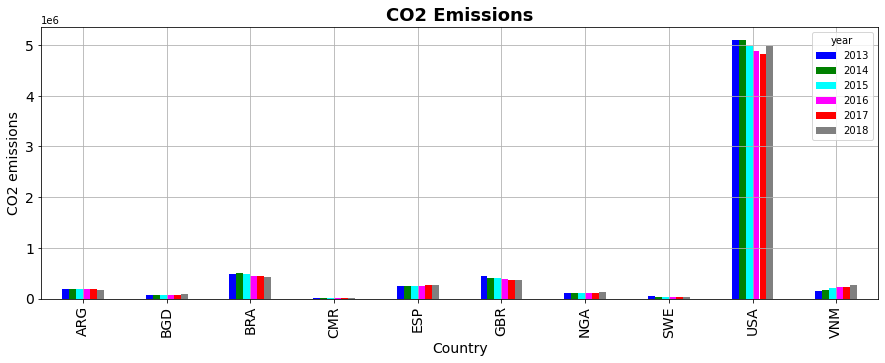

In [306]:
#co2
co2.plot(kind='bar', color=['blue', 'green', 'cyan', 'magenta', 'red','gray'], figsize=(15,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Country",fontsize=14)
plt.ylabel("CO2 emissions",fontsize = 14)
plt.title("CO2 Emissions",fontsize = 18, fontweight='bold')
plt.grid(True)

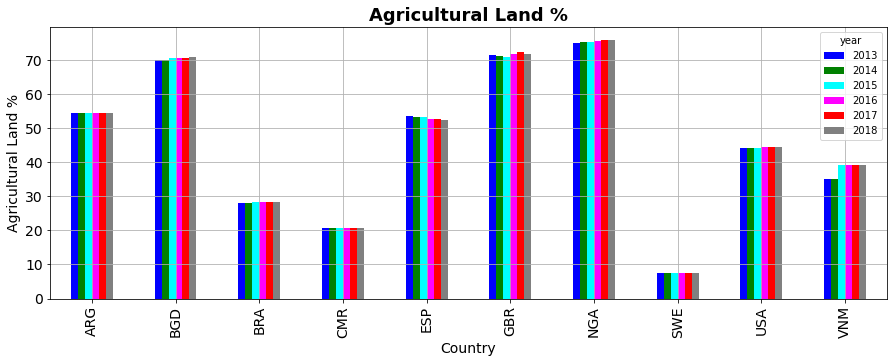

In [307]:
#agri_land
agri_land.plot(kind='bar', color=['blue', 'green', 'cyan', 'magenta', 'red','gray'], figsize=(15,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Country",fontsize=14)
plt.ylabel("Agricultural Land %",fontsize = 14)
plt.title("Agricultural Land %",fontsize = 18, fontweight='bold')
plt.grid(True)

#### For year-wise (in x-axis) visualization, I went for line plot since easier to identify the yearly trends of each country. One can look at the line plots and get an idea if the following year the numbers will be higher or lower.

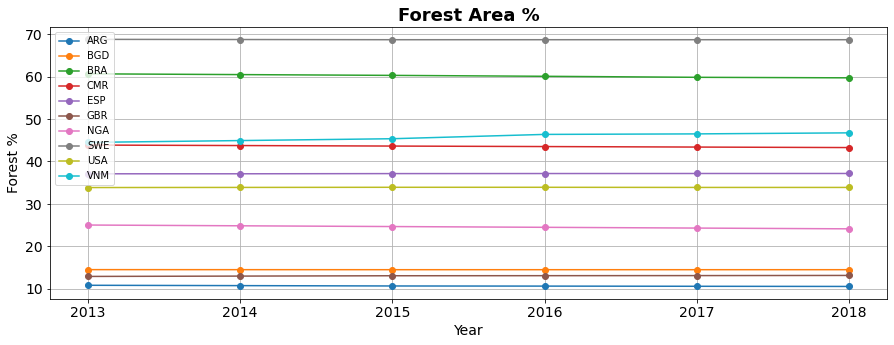

In [308]:
#Forest
forest_2.plot(kind='line', marker='o', figsize=(15,5))
plt.legend(loc="upper left")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Forest %",fontsize = 14)
plt.title("Forest Area %",fontsize = 18, fontweight='bold')
plt.grid(True)

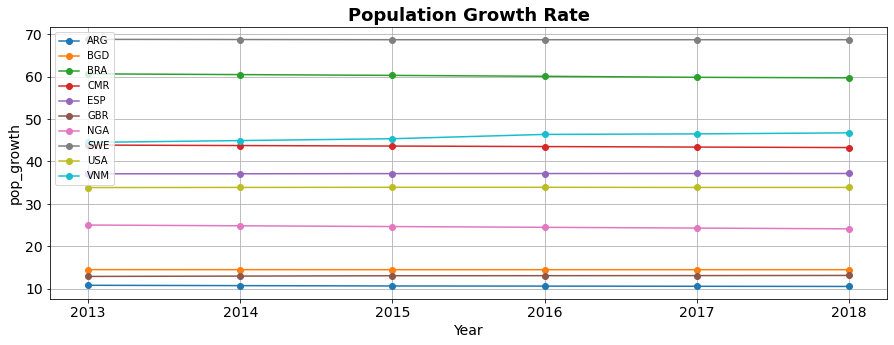

In [309]:
#pop_growth
forest_2.plot(kind='line', marker='o', figsize=(15,5))
plt.legend(loc="upper left")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.ylabel("pop_growth",fontsize = 14)
plt.title("Population Growth Rate",fontsize = 18, fontweight='bold')
plt.grid(True)

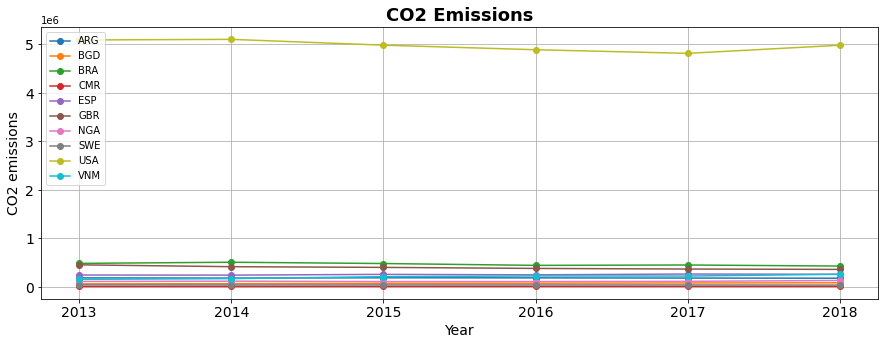

In [310]:
#co2

co2_2.plot(kind='line', marker='o', figsize=(15,5))
plt.legend(loc="upper left")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.ylabel("CO2 emissions",fontsize = 14)
plt.title("CO2 Emissions",fontsize = 18, fontweight='bold')
plt.grid(True)

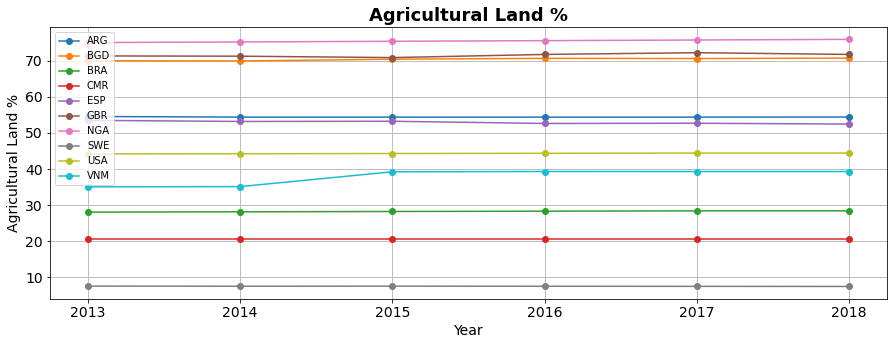

In [311]:
#agri_land
agri_land_2.plot(kind='line', marker='o', figsize=(15,5))
plt.legend(loc="upper left")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Agricultural Land %",fontsize = 14)
plt.title("Agricultural Land %",fontsize = 18, fontweight='bold')
plt.grid(True)